# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')


# Loading and  Data Pre-Processing For EDA

In [2]:
cars4u=pd.read_csv('used_cars_data.csv',index_col=0)
cars4u.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#To get number of rows and columns rspectively
cars4u.shape

(7253, 13)

There are 7253 rows and 13 columns

In [4]:
#To get random data of 10 rows
np.random.seed(1)
cars4u.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [5]:
#To check data type
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


Some columns(Mileage,Engine,Power,New_Price) with numerical values appear as objects and for the purpose of exploration and analysis will be changed to numerical

In [6]:
# looking at which columns have the most missing values
cars4u.isna().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

The column New_Price has alot of missing values

## To convert the strings in the column to numeric

In [7]:
#To make the Mileage column numerical, a split is applied to separate the numbers and units 
Mileage_num = cars4u["Mileage"].str.split(" ", n = 1,expand=True ) 
Mileage_num.head()

,0,1
S.No.,,
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [8]:
#To reassign split columns and unit column dropped
cars4u["Mileage"]= Mileage_num[0]   
cars4u["Mileage_unit"]= Mileage_num[1]
cars4u.drop(columns=['Mileage_unit'], inplace= True)
#To convert to float
cars4u['Mileage']=pd.to_numeric(cars4u['Mileage'],errors='coerce')
cars4u['Mileage'].dtypes

dtype('float64')

In [9]:
#To make the Power column numerical a split is applied and unit column dropped
Power_num=cars4u['Power'].str.split(" ", n = 1, expand = True)
cars4u['Power']=Power_num[0]
cars4u['Power_Unit']= Power_num[1]
cars4u.drop(columns=['Power_Unit'], inplace= True)
#To convert to float
cars4u['Power']=pd.to_numeric(cars4u['Power'],errors='coerce')
cars4u['Power'].dtypes

dtype('float64')

In [10]:
#To make the Price column numerical a split is applied and unit column dropped
New_Price_num=cars4u['New_Price'].str.split(" ", n=1, expand= True)
cars4u["New_Price"]= New_Price_num[0]   
cars4u["New_Price_Unit"]= New_Price_num[1]
cars4u.drop(columns=['New_Price_Unit'], inplace= True)
#To convert to float
cars4u['New_Price']=pd.to_numeric(cars4u['New_Price'],errors='coerce')
cars4u['New_Price'].dtypes

dtype('float64')

In [11]:
#To make the Engine column numerical a split is applied
Engine_num=cars4u['Engine'].str.split(" ", n = 1, expand = True)
Engine_num.head(2)

,0,1
S.No.,,
0,998,CC
1,1582,CC


In [12]:
#The unit column dropped and column converted to numeric
cars4u['Engine']=Engine_num[0]
cars4u['Engine_Unit']= Engine_num[1]
cars4u.drop(columns=['Engine_Unit'], inplace= True)
#To convert to float
cars4u['Engine']=pd.to_numeric(cars4u['Engine'],errors='coerce')
cars4u['Engine'].dtypes

dtype('float64')

In [13]:
np.random.seed(1)
cars4u.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497.0,121.36,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.10,2499.0,141.00,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.90,1197.0,82.00,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755.0,171.50,7.0,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197.0,80.00,5.0,NaN,2.50


In [14]:
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 793.3+ KB


In [15]:
#Fixing the datatypes from object to category
cars4u['Transmission']=cars4u.Transmission.astype('category')
cars4u['Name']=cars4u.Name.astype('category')
cars4u['Location']=cars4u.Location.astype('category')
cars4u['Fuel_Type']=cars4u.Fuel_Type.astype('category')
cars4u['Owner_Type']=cars4u.Owner_Type.astype('category')
cars4u['Year']=cars4u.Year.astype('category')                                            

Data is now ready for Exploratory Data Analysis. For EDA we shall treat the Year

In [16]:
#Year=category, Mileage=numeric, engine=numeric, seat=category,new price=float,Power=float
cars4u['Engine'].describe()

count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

# Data Summary

In [17]:
#To get a summary of numerical and categorical variables
cars4u.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,23,2015,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616


In [18]:
#To find highest selling preferences
cars4u.mode()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mahindra XUV500 W8 2WD,Mumbai,2015,60000.0,Diesel,Manual,First,17.0,1197.0,74.0,5.0,4.78,4.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.36,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.71,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.13,NaN


OBSERVATIONS
There appears some skewness in the price of the used cars, possibility of outliers
There also appears some skewness in the New Price, this column has a lot of missing values, possibility of outliers
2015 cars sold most compared with other years
Manual cars have more sales
Mumbai has the most sale compared with other region


In [19]:
#To look at skewness of data
cars4u.skew()

Kilometers_Driven    61.582575
Mileage              -0.438321
Engine                1.412413
Power                 1.961178
Seats                 1.902262
New_Price             1.844862
Price                 3.335232
dtype: float64

There appears a general skewness in the dataset except for Mileage

# UNIVARIATE ANALYSIS

In [20]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

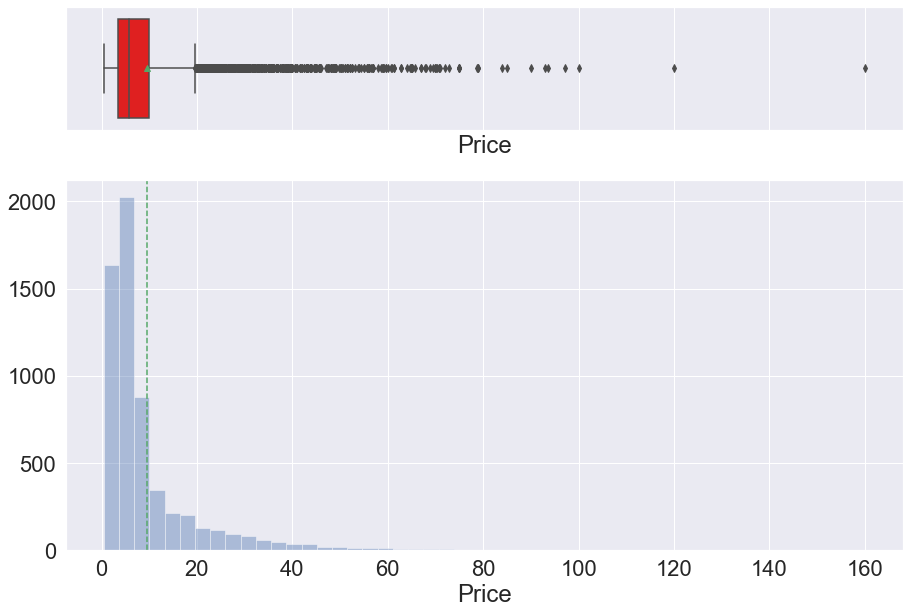

In [21]:
# To explore the dependent variable Price
histogram_boxplot(cars4u.Price)

Price distribution is right skewed
Mean price of used car is about 10 INRLahks
75% of the used sample cars were bought under 10 INR Lahks
50% of the used sample cars were bought under 6 INR Lahks
There are a number of outliers who bought usedcars at much higher prices

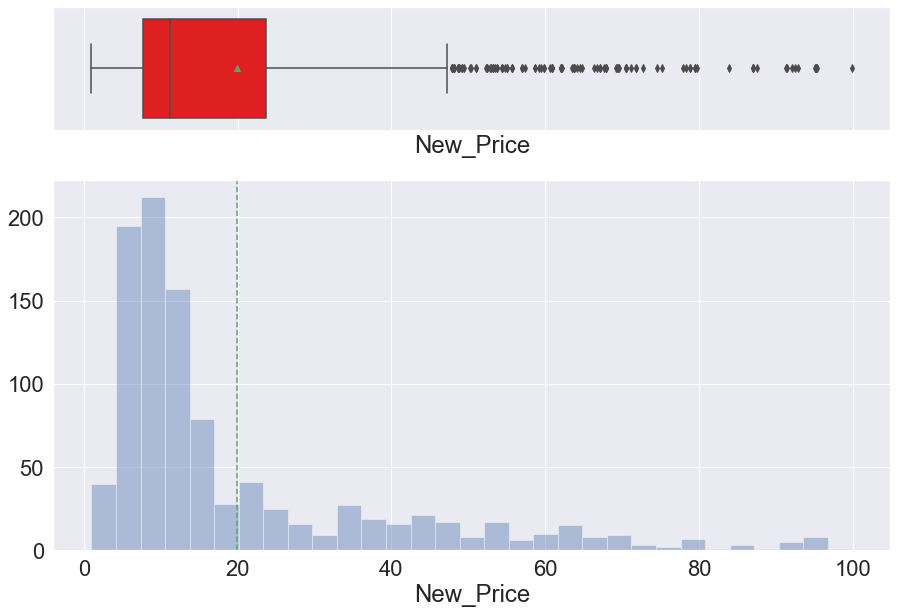

In [22]:
# To check the frequency and distribution of the price of New cars
histogram_boxplot(cars4u.New_Price)

Price distribution of price of new car is also right skewed
Mean price of new car is about 20 INRLahks
75% of the used sample cars were bought under 24 INR Lahks
50% of the used sample cars were bought under11.5 INR Lahks
There are a number of outliers who bought cars at much higher prices

## Distribution of numerical variable

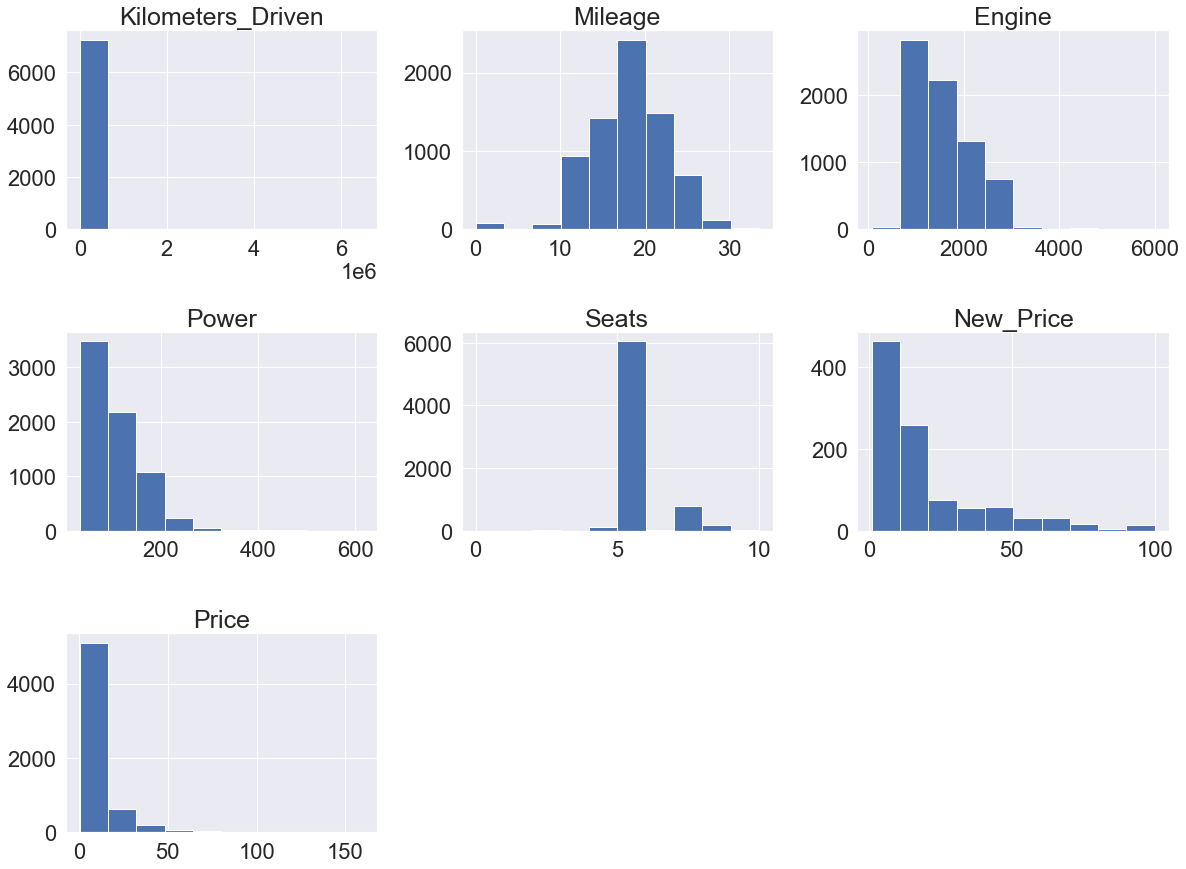

In [24]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = cars4u.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(cars4u[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

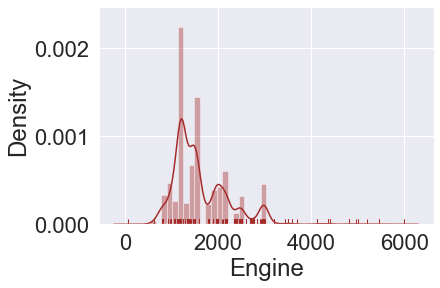

In [25]:
#KDE plot for Engine distribution
sns.distplot(cars4u['Engine'],color='brown',kde=True,rug=True);

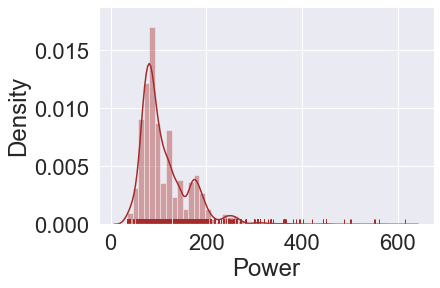

In [26]:
#KDE plot for Power distribution
sns.distplot(cars4u['Power'],color='brown',kde=True,rug=True);

Insights:
The Kilometers_Driven will need standardisation 
The Mileage appears to follow normal distribution
All others appear to be right skewed.This is indicative of higher range values, outlier contribution


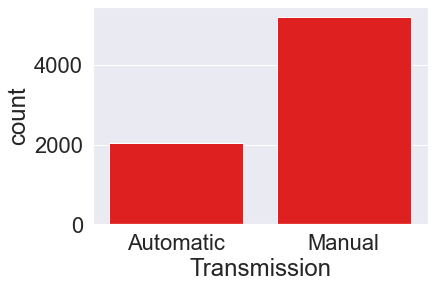

In [27]:
#Univariate analysis for Transmission
sns.countplot(cars4u['Transmission'],color='red');

Manual cars are most bought

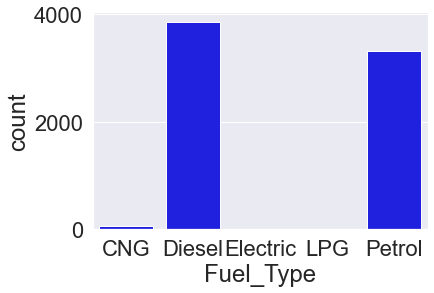

In [28]:
#Univariate analysis for Fuel Type
sns.countplot(cars4u['Fuel_Type'],color='blue');


From sample data Diesel cars have most sales

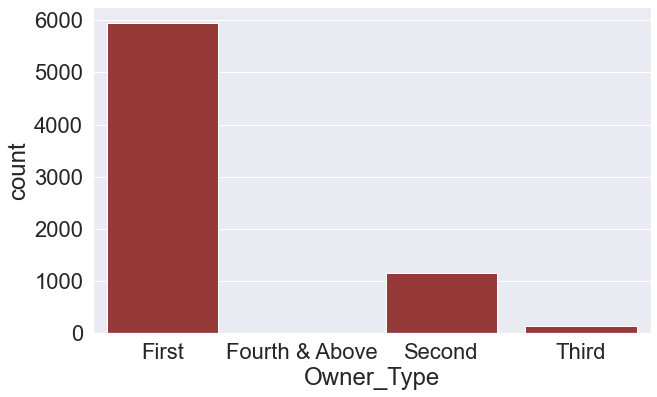

In [29]:
#Univariate analysis for Ownert Type 
plt.figure(figsize=(10,6))
sns.countplot(cars4u['Owner_Type'],color='brown');

Most of the cars are of the FirstOwner type

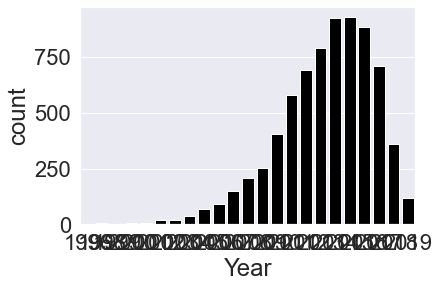

In [30]:
sns.countplot(cars4u['Year'],color='black');


# BIVARIATE ANALYSIS

## CORRELATION

In [31]:
cars4u.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Kilometers_Driven,1.000000,-0.069122,0.094818,0.030164,0.090221,0.015700,-0.011493
Mileage,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.346379,-0.306593
Engine,0.094818,-0.593569,1.000000,0.859771,0.399262,0.583911,0.658354
Power,0.030164,-0.531771,0.859771,1.000000,0.095905,0.687479,0.772566
Seats,0.090221,-0.310632,0.399262,0.095905,1.000000,0.001917,0.052225
New_Price,0.015700,-0.346379,0.583911,0.687479,0.001917,1.000000,0.686588
Price,-0.011493,-0.306593,0.658354,0.772566,0.052225,0.686588,1.000000


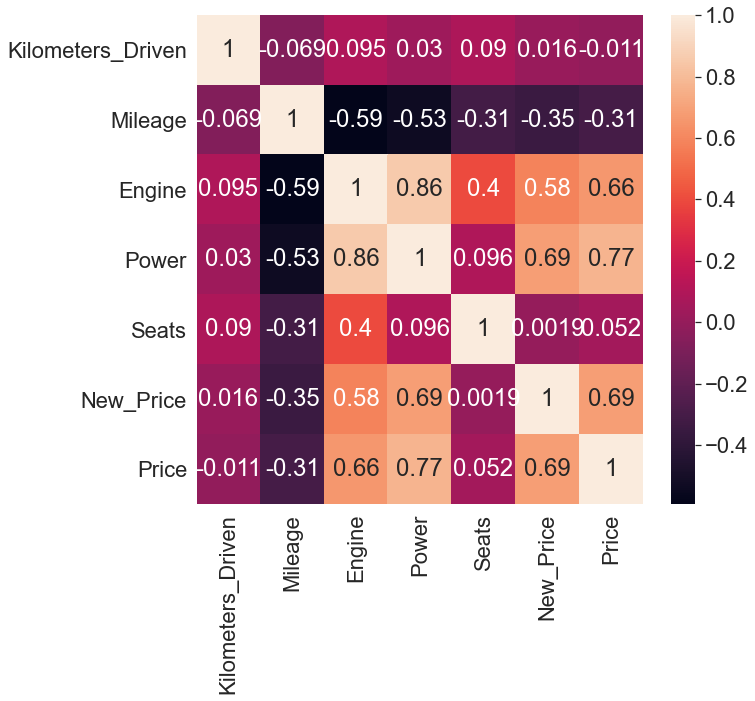

In [32]:
#We shall use a heat map to show correlation among numerical variables
num_var=['Kilometers_Driven','Mileage','Engine',"Power",'Seats', 'New_Price', 'Price']
plt.figure(figsize=(10,9))
corr=cars4u[num_var].corr()
sns.heatmap(corr,annot=True);

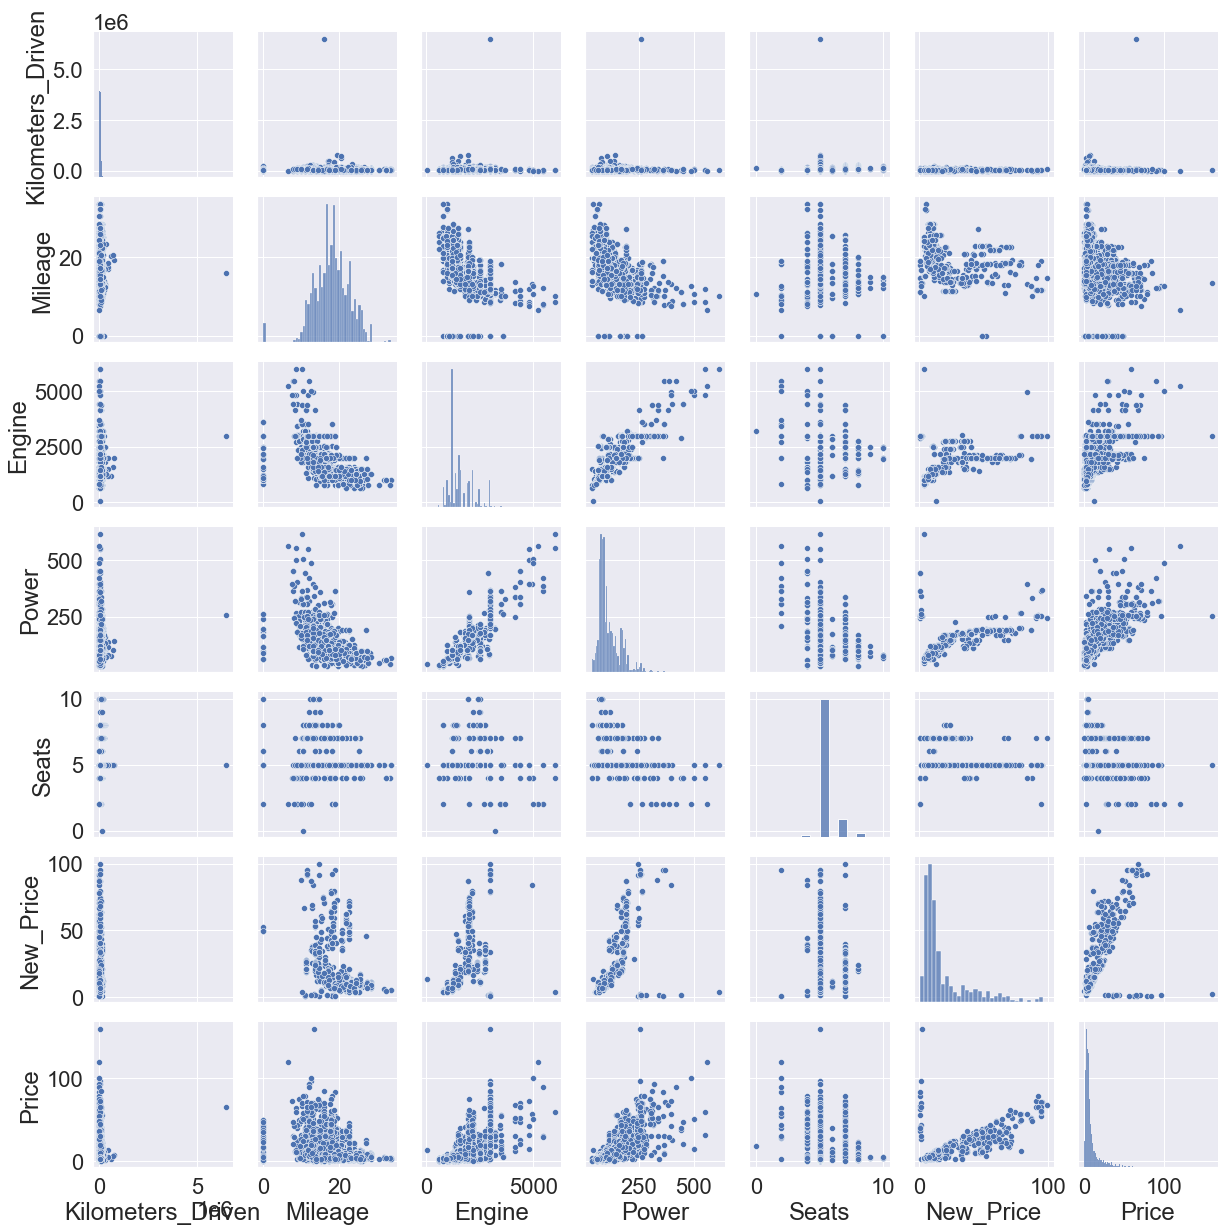

In [33]:
# We shall use a scatter plot to visualise the data
sns.pairplot(cars4u[num_var],);

## OBSERVATIONS

1.There is a strong positive correlation between the New Price and the Price of the used cars of 0.68. This indicates
the higher the New-Price the the higher the price of the used cars

2.There is a strong positive correlation between Power and the Price of the used and new cars. Correlation is about 0.77 and 0.69 respectively. As the power of the car increases, the price of both New and Used go up.

3. There is also a positive correlation between the Engine size and the price of used and new cars. Correlation is about 0.58 and 0.66 respectively.The price follows same direction as the price.

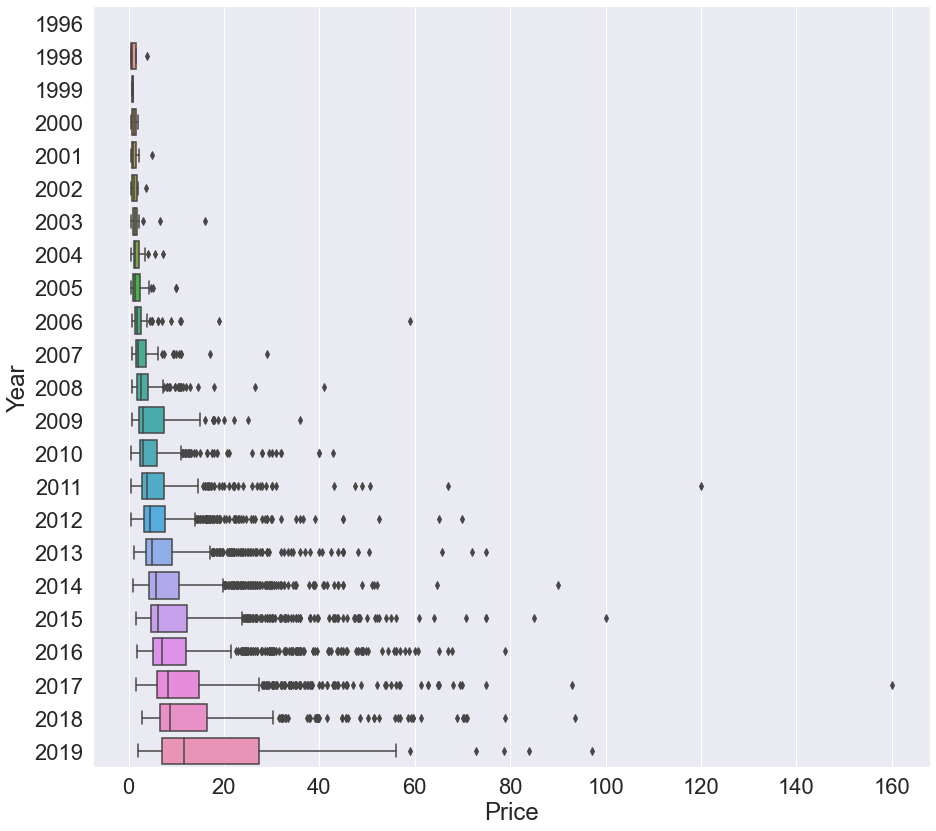

In [34]:
#To visualise Year and Price
plt.figure(figsize=(15,14))
sns.boxplot(cars4u['Price'], cars4u["Year"]);

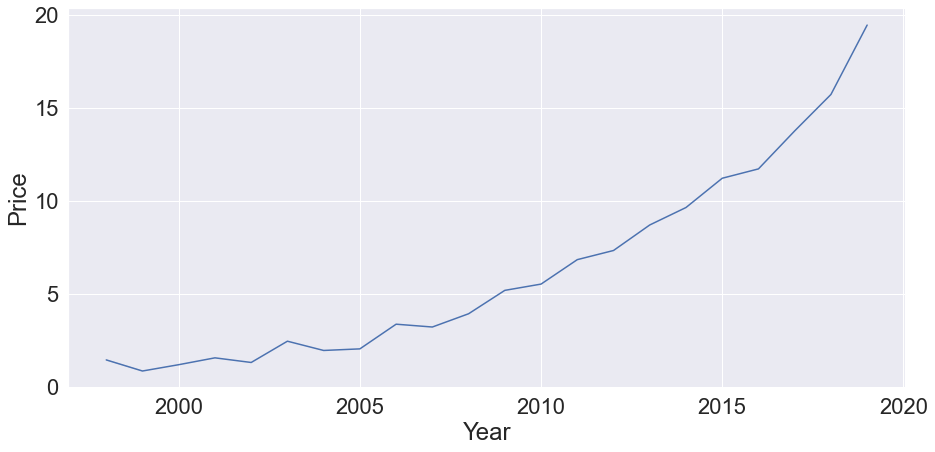

In [35]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',ci=0,
             data=cars4u);

The price of used cars goes as the year of manufacture 
The price starts with a gentle slope and sharply increases after 2015

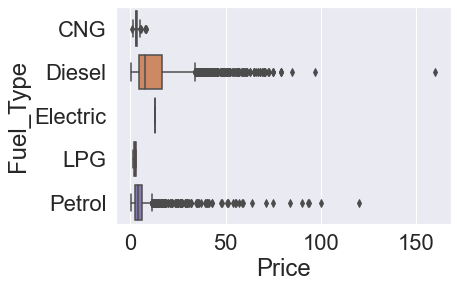

In [36]:
#To visualise Price and fuel Type
sns.boxplot(cars4u['Price'], cars4u["Fuel_Type"]);

The diesel cars have a higher price range than other types